In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
order=pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx', sheet_name=0)
supply=pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx', sheet_name=1)
data1 = np.array(pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx', sheet_name=0))
data2 = np.array(pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx', sheet_name=1))
data_order = data1[:, 2:]
data_supply = data2[:, 2:]
data_supplier = data1[:, 0:2]


#### 作图观察供货量和需求量的关系

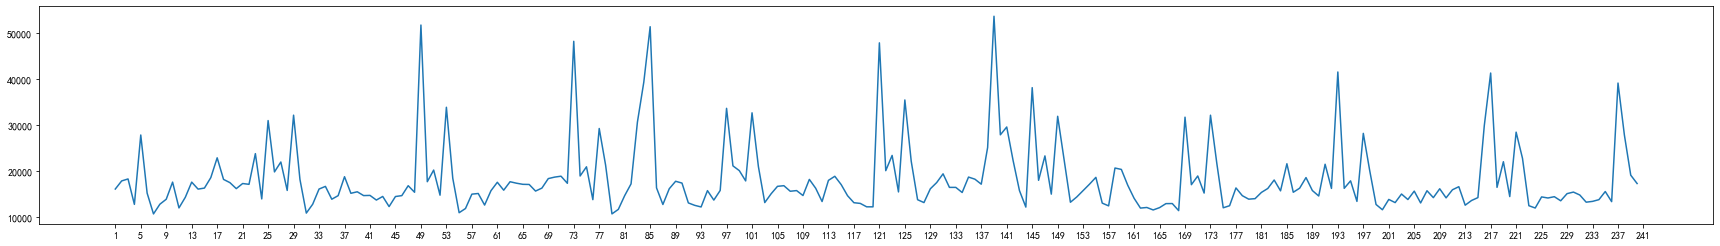

In [4]:
supply.columns
sup_sum = supply.drop(['供应商ID', '材料分类'], axis=1).agg('sum')
plt.figure(figsize=[30,4])
plt.xticks(range(1,242,4))
plt.plot(range(1,241), sup_sum)

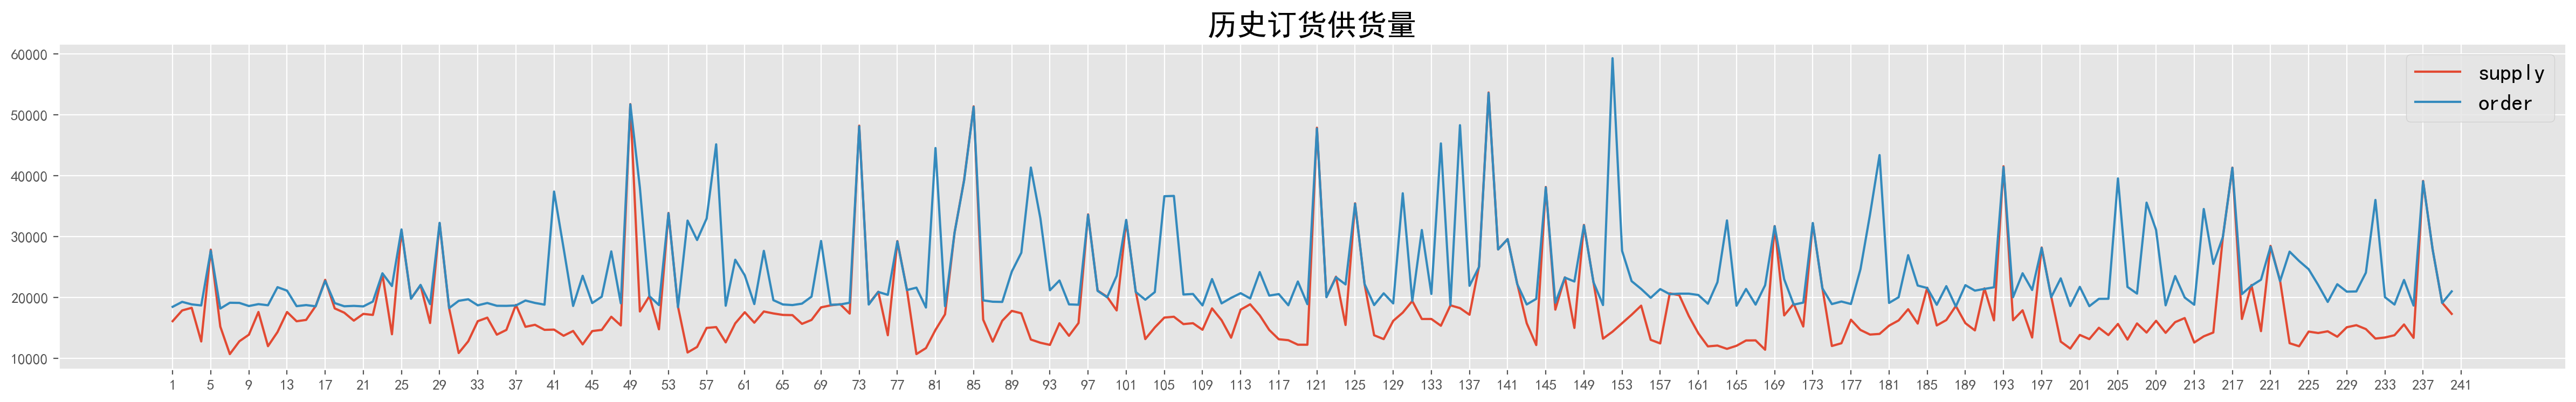

In [5]:
order.columns
ord_sum = order.drop(['供应商ID', '材料分类'], axis=1).agg('sum')

plt.figure(figsize=[30,4],dpi=200)
plt.style.use('ggplot')
plt.xticks(range(1,242,4),fontsize=10)
plt.title('历史订货供货量', fontsize=20)
plt.plot(range(1,241), sup_sum, label='supply')
plt.plot(range(1,241), ord_sum, label='order')
plt.legend(fontsize=15)
plt.savefig('供需关系.jpg')

<AxesSubplot:>

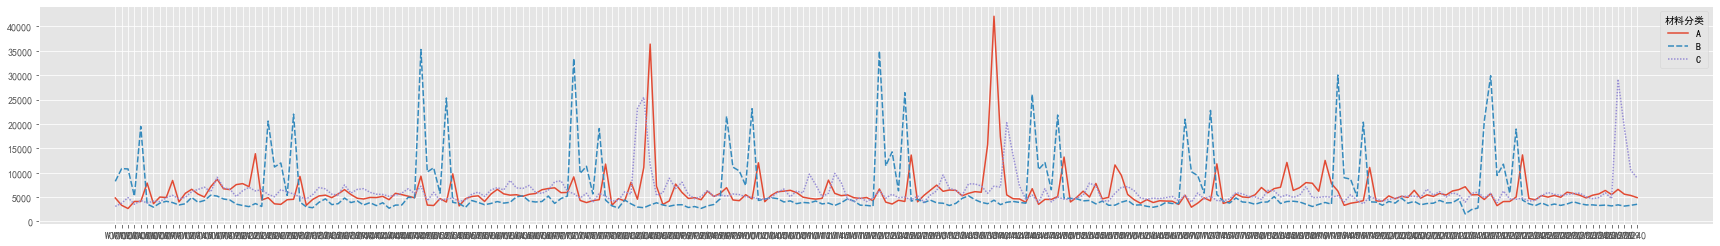

In [6]:
sup_divs = supply.drop('供应商ID', axis=1).groupby('材料分类').agg('sum')
sup_divs = sup_divs.T
plt.figure(figsize=[30,4])
sns.lineplot(data=sup_divs)

#### 供需关系的误差性

In [7]:
#  计算各供应商订货量/供货量能够生产的产品数
data_order2 = np.zeros(data_order.shape)
for i in range(data_order.shape[0]):
    if data_supplier[i, 1] == 'A':
        data_order2[i] = data_order[i] * (1 / 0.6)
    elif data_supplier[i, 1] == 'B':
        data_order2[i] = data_order[i] * (1 / 0.66)
    else:
        data_order2[i] = data_order[i] * (1 / 0.72)
data_supply2 = np.zeros(data_supply.shape)
for i in range(data_supply.shape[0]):
    if data_supplier[i, 1] == 'A':
        data_supply2[i] = data_supply[i] * (1 / 0.6)
    elif data_supplier[i, 1] == 'B':
        data_supply2[i] = data_supply[i] * (1 / 0.66)
    else:
        data_supply2[i] = data_supply[i] * (1 / 0.72)

# 供货偏移指数 1/(供货量与订货量差的平方平均数+1)
diff = data_supply2 - data_order2
supply_shift = []
for k in range(402):
    shift_i = np.mean(np.square(diff[k][data_order2[k] != 0] / data_order2[k][data_order2[k] != 0]))
    supply_shift.append(shift_i)
supply_shift = np.array(supply_shift)
supply_shift2 = 1 / (supply_shift + 1)

# 供需量的各自综合
supply_sum = data_supply2.sum(axis=1)
order_sum = data_order2.sum(axis=1)



In [ ]:
supply_stability = np.array(
    [np.std(data_supply2[k][data_order2[k] != 0]) / np.mean(data_supply2[k][data_order2[k] != 0])
     for k in range(402)])
supply_stability2 = 1 / (supply_stability + 1)

#### 稳定性特征

In [8]:
# 供货稳定指数 1/(供货量方差+1）
supply_stability = np.array(
    [np.var(data_supply2[k][data_order2[k] != 0])
     for k in range(402)])
supply_stability2 = 1 / (supply_stability + 1)

# 订货稳定指数  1/(订货量方差+1)
order_stability = np.array(
    [np.var(data_order2[k][data_order2[k] != 0]) 
     for k in range(402)])
order_stability2 = 1 / (order_stability + 1)

<Figure size 6000x800 with 0 Axes>

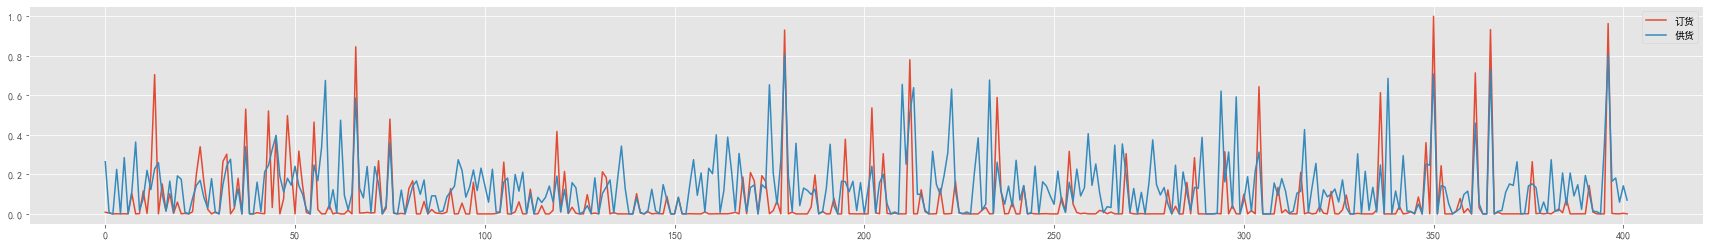

In [9]:
# plt.figure(figsize=[30,4],dpi=200)
# plt.title('稳定性', fontsize=20)
# sns.lineplot(x=range(402), y=order_stability2.sum(axis=1))
# sns.lineplot(x=range(402), y=supply_stability2.sum(axis=1))
# plt.savefig('历史订货供货量.jpg')
from cProfile import label


plt.figure(figsize=[30,4],dpi=200)
plt.figure(figsize=[30,4])
sns.lineplot(x=range(402), y=order_stability2,label='订货')
sns.lineplot(x=range(402), y=supply_stability2,label='供货')
plt.savefig('稳定性曲线.jpg')

#### 市场份额(A,B,C占比)

In [10]:
all = np.zeros(402)
for i in range(len(all)):
    if data_supplier[i, 1] == 'A':
        all[i] = np.sum(data_supply2[data_supplier[:, 1] == "A", :])
    elif data_supplier[i, 1] == 'B':
        all[i] = np.sum(data_supply2[data_supplier[:, 1] == "B", :])
    else:
        all[i] = np.sum(data_supply2[data_supplier[:, 1] == "C", :])
market_share = data_supply2.sum(axis=1) / all


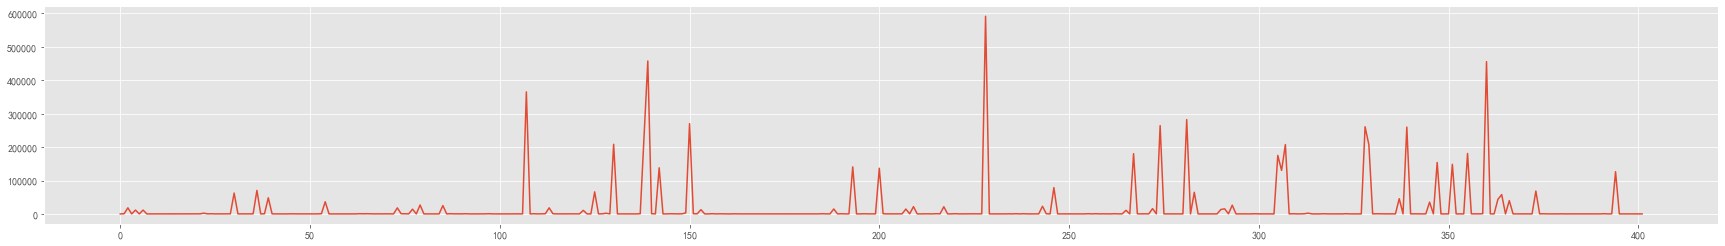

In [11]:
plt.figure(figsize=[30,4])
sns.lineplot(x=range(402), y=data_supply2.sum(axis=1))
plt.savefig('市场份额.jpg')

#### 重大订单频率

In [12]:
important_freq = np.zeros(402)
for i in range(data_order2.shape[1]):
    index = np.argsort(data_order2[:, i])[::-1][0:20]
    important_freq[index] += 1
important_freq


array([  0.,   0.,   7.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        10.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,  43.,   0.,   0.,
         0.,   0.,   0.,  37.,   0.,   0.,  17.,   0.,   0.,   0.,   0.,
         0.,   0.,   4.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,  19.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   4.,   0.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  31.,   0.,   0.,   0.,
        11.,   0.,   3.,   0.,   0.,   3.,   0.,   0.,  30.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   8.,   0.,   2.,
         1.,   0.,   0.,   4.,   0.,   0.,   0.,   2., 240.,   0.,   0.,
         2.,   0.,   0.,  24.,   0.,   0.,   6.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  33.,   0.,   0.,   0.,   0., 236.,   0.,
         0.,   1.,   0.,   1.,   7.,   3.,  24.,  30.,   0.,   0., 142.,
         0.,   4.,   0.,   0.,   0.,   0.,   8., 23

#### 违约率

In [13]:
default_rate = ((data_order > 0) & (data_supply == 0)).sum(axis=1) / (data_order != 0).sum(axis=1)
default_rate2 = 1 - default_rate

In [14]:
data_feature = np.vstack([supply_sum, supply_stability2, supply_shift2, order_sum, 
order_stability2, important_freq,market_share, default_rate2]).T

In [15]:
name=[]
for num in range(1,403):
    if(num<10):
        id = 'W'+'00'+str(num)
    elif(num>=10):
        id = 'W'+'0'+str(num)
    name.append(id)


In [16]:


data = {
    '供货商':name,
    '供货数量' :supply_sum,
    '供货稳定指数':supply_stability2, 
    '供货偏移指数':supply_shift2, 
    '订货数量':order_sum, 
    '订货稳定指数':order_stability2, 
    '重要订单接受频次':important_freq,
    '供应商细分市场份额':market_share, 
    '供应商守约率':default_rate2,
}
df=pd.DataFrame(data=data)

In [17]:
df.to_excel('特征值数据.xlsx')

In [18]:

feature_scaled = deepcopy(data_feature)
feature_scaled[:, [0, 3, 5]] = MinMaxScaler().fit_transform(feature_scaled[:, [0, 3, 5]])

In [49]:
from binascii import b2a_hex


pca = PCA(svd_solver='full')
feature_pca = pca.fit_transform(feature_scaled)
variance = pca.explained_variance_ratio_.reshape(-1, 1)
supplier_score = feature_pca @ variance
components = pca.components_
pd.DataFrame(supplier_score).to_excel('供应商得分.xlsx')  # 输出402家企业加权得分
pd.DataFrame(np.hstack((variance, components))).to_excel('主成分参数.xlsx')  # 输出主成分的参数

In [42]:
# 计算各企业最大供应量
max_offer = data_supply2.max(axis=1).reshape(-1, 1)
a = np.hstack((supplier_score, max_offer))
a = a[np.argsort(a[:, 0])[::-1]]  # a从大到小排序
m = np.array([a[:i, 1].sum() for i in range(50)])